#In this notebook I will compare 7 Machine learning techniques:

1. Linear regression
2. Forward and backward selection
3. Ridge
4. Lasso
5. Elastic net
6. PCR
7. PLS


In [1]:
#import neccessary packages 
import pandas as pd #importing data
import pandas.testing as tm
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt #Import matplotlib for plotting graphs
%matplotlib inline

#Linear regression packages
from sklearn import linear_model #import linear_model regression
from sklearn.metrics import r2_score,mean_squared_error #import r2_score and MSE

#extra packages needed for Ridge & Lasso regression 
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

#Extra packages for Elastic Net 
from numpy import mean
from numpy import std
from numpy import arange
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

#Extra Packages for PCR 
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We will be trying to predict the sales of carseats.  In this data set, a single observation represents a location where carseats are sold.  In particular the training data set consists of the following variables:
* Sales - Unit sales (in thousands) at each location
* CompPrice - Price charged by competitor at each location
* Income - Community income level (in thousands of dollars)
* Advertising - Local advertising budget for company at each location (in    thousands of dollars)
* Population - Population size in region (in thousands)
* Price - Price company charges for car seats at each site
* ShelveLoc - A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* Age - Average age of the local population
* Education - Education level at each location
* Urban - A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* US - A factor with levels No and Yes to indicate whether the store is in the US or not


In [2]:
#Retrieving data
url = "https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv"
data = pd.read_csv(url)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


#Data Preproccesing

In [3]:
#Dummies
df = pd.get_dummies(data)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Bad     400 non-null    uint8  
 9   ShelveLoc_Good    400 non-null    uint8  
 10  ShelveLoc_Medium  400 non-null    uint8  
 11  Urban_No          400 non-null    uint8  
 12  Urban_Yes         400 non-null    uint8  
 13  US_No             400 non-null    uint8  
 14  US_Yes            400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(7)
memory usage: 27.9 KB


In [5]:
#Creating Dummies variables
data_dummies = (df[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']])
data_dummies.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.240000,0.212500,0.547500,0.295000,0.705000,0.355000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.427618,0.409589,0.498362,0.456614,0.456614,0.479113,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# define the data/predictors as the pre-set feature names  
features = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
df_1 = data_dummies[features]
# Put the target (Sold seats = 'Sales') in another DataFrame
target = data_dummies[['Sales']]

#Linear Regression

In [7]:
## Without a constant

X = df_1["CompPrice"]
y = target["Sales"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              2627.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):                   1.26e-177
Time:                        07:47:03   Log-Likelihood:                         -994.63
No. Observations:                 400   AIC:                                      1991.
Df Residuals:                     399   BIC:                                      1995.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CompPrice      0.0593      0.001     51.252      0.000       0.057       0.062
==============================================================================
Omnibus:                        3.220   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                3.285
Skew:                           0.215   Prob(JB):                        0.194
Kurtosis:                       2.886   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpreting the Table** —  

*   We see the Dependent variable = Sales
*   Model used = OLS (Ordinary Least Squares)
*   Method used = “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line
*   The coefficient of 0.0593 means that as the CompPrice variable increases by 1, the predicted value of Sales increases by 0.0593. 
*   R-squared — the percentage of variance our model explains i.e. 86.8% (Good); 




In [8]:
#Splitting Data
X = df_1
y = target["Sales"]

#Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape); print(X_test.shape)

(320, 14)
(80, 14)


In [9]:
#Linear Regression
print("Linear Regression")
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train_lr= lr.predict(X_train)
print("\tRMSE training: " + str(np.sqrt(mean_squared_error(y_train,pred_train_lr))))
print("\tR-squared training:  " + str(r2_score(y_train, pred_train_lr)))

pred_test_lr= lr.predict(X_test)
print("\tRMSE testing: " +str(np.sqrt(mean_squared_error(y_test,pred_test_lr)))) 
print("\tR-squared testing: " + str(r2_score(y_test, pred_test_lr)))

Linear Regression
	RMSE training: 0.9828630046011684
	R-squared training:  0.8768584027489792
	RMSE testing: 1.1078274030007706
	R-squared testing: 0.8520714327642556


As we can see from the results that the Linear Model gives us a  r-squared of 87.6% on the training and 85.2% on the testing data. This is quite high. Lets see if we can try improve this by implementing other models. 

#Forward & Backward Selection

In [10]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [11]:
#Forward Selection
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model


In [12]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  14 models on 1 predictors in 0.08311319351196289 seconds.
Processed  13 models on 2 predictors in 0.06594228744506836 seconds.
Processed  12 models on 3 predictors in 0.06758642196655273 seconds.
Processed  11 models on 4 predictors in 0.0803523063659668 seconds.
Processed  10 models on 5 predictors in 0.0804147720336914 seconds.
Processed  9 models on 6 predictors in 0.04371500015258789 seconds.
Processed  8 models on 7 predictors in 0.058243751525878906 seconds.
Processed  7 models on 8 predictors in 0.05600690841674805 seconds.
Processed  6 models on 9 predictors in 0.05743122100830078 seconds.
Processed  5 models on 10 predictors in 0.09278655052185059 seconds.
Processed  4 models on 11 predictors in 0.02266073226928711 seconds.
Processed  3 models on 12 predictors in 0.03736233711242676 seconds.
Processed  2 models on 13 predictors in 0.047164201736450195 seconds.
Processed  1 models on 14 predictors in 0.020010948181152344 seconds.
Total elapsed time: 0.958948373794555

In [13]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())
print(models_fwd.loc[3, "model"].summary())
print(models_fwd.loc[4, "model"].summary())
print(models_fwd.loc[5, "model"].summary())
print(models_fwd.loc[6, "model"].summary())
print(models_fwd.loc[7, "model"].summary())
print(models_fwd.loc[8, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              2627.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):                   1.26e-177
Time:                        07:47:04   Log-Likelihood:                         -994.63
No. Observations:                 400   AIC:                                      1991.
Df Residuals:                     399   BIC:                                      1995.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Above code compares the performance between 1 variable to 8 variable model selection using forward selection. We can see that all models perform very well by looking at the r-squared figure(i.e. 1 variable has an r-squared of 86.8%).

The change in variables gives us a better accuracy for the first 5 models however introducing a 6th/7th variable only increases the accuracy slighlty.

Using forward selection for OLS: 
1 Variable - 86.8% of the Sales variation is explained by the *CompPrice* feature.
2 Variable - 91.1%% of the Sales variation is explained by the *CompPrice* & *Price* feature features.
3 Variable - 94.6% of the Sales variation is explained by introducing the *ShlevLoc_Good* feature.
with all p-values being 0 for both features.

Let's see how the models stack up against backward selection:

In [14]:
#Backward Selection
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        print(combo)
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [15]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

('CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No')
('CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_Yes')
('CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_No', 'US_No', 'US_Yes')
('CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_No', 'US_Yes')
('CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes')
('CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Bad', 'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Ye

For this data, the best one-variable through nine-variable
models are very different for forward selection and backward, as seen from above. Backward selection shows that Urban_No/Urban_Yes are the best one variable predictors. Lets see how they perform against one another.

In [16]:
print(models_bwd.loc[1, "model"].summary())
print(models_fwd.loc[1, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.613
Model:                            OLS   Adj. R-squared (uncentered):              0.612
Method:                 Least Squares   F-statistic:                              631.9
Date:                Tue, 07 Dec 2021   Prob (F-statistic):                    2.94e-84
Time:                        07:47:05   Log-Likelihood:                         -1210.0
No. Observations:                 400   AIC:                                      2422.
Df Residuals:                     399   BIC:                                      2426.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

As we can see Backward selection is giving us an variance ecplanation of 61.3%
Whilst forward selection gives us 86.8%. Therefore we should use forward selection as it gives us much better accuracy.

In [17]:
print(models_bwd.loc[5, "model"].summary())
print(models_fwd.loc[5, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     118.2
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           3.38e-66
Time:                        07:47:05   Log-Likelihood:                -824.94
No. Observations:                 400   AIC:                             1660.
Df Residuals:                     395   BIC:                             1680.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Price               -0.0570      0.004  

Once again, Forward selection outperforms backward selection massively when we use a 5 variable predictor. as seen by the R-squareds (backward - 54.5% and forward - 96.9%) Solidifying our decision to use forward selection.

In [18]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[13, "model"].params)

-----------------
Foward Selection:
-----------------
CompPrice           0.092815
Price              -0.095358
ShelveLoc_Good      5.703993
Advertising         0.123095
ShelveLoc_Medium    2.810525
Income              0.015803
Age                -0.046045
ShelveLoc_Bad       0.853810
US_No               0.184093
Education          -0.021102
Urban_No            4.622720
Population          0.000208
Urban_Yes           4.745607
dtype: float64


In [19]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[13, "model"].params)

-------------------
Backward Selection:
-------------------
CompPrice           0.092815
Income              0.015803
Advertising         0.123095
Population          0.000208
Price              -0.095358
Age                -0.046045
Education          -0.021102
ShelveLoc_Bad       0.853810
ShelveLoc_Good      5.703993
ShelveLoc_Medium    2.810525
Urban_No            4.622720
Urban_Yes           4.745607
US_No               0.184093
dtype: float64


#Ridge & Lasso regression

In [20]:
#Ridge Regression
print("Ridge Regression")
rr = Ridge(alpha=0.2)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print("\tRMSE training: " + str(np.sqrt(mean_squared_error(y_train,pred_train_rr))))
print("\tR-squared training: " + str(r2_score(y_train, pred_train_rr)))

pred_test_rr= rr.predict(X_test)
print("\tRMSE testing: " + str(np.sqrt(mean_squared_error(y_test,pred_test_rr)))) 
print("\tR-squared testing: " + str(r2_score(y_test, pred_test_rr)))

Ridge Regression
	RMSE training: 0.9828739080320273
	R-squared training: 0.8768556705811539
	RMSE testing: 1.107336785156661
	R-squared testing: 0.8522024284839407


Ridge is exact as accurate as Linear regression. Lets try Lasso.

In [21]:
#Lasso regression 
print("Lasso Regression")
model_lasso = Lasso(alpha=0.2)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("\tRMSE training: " + str(np.sqrt(mean_squared_error(y_train,pred_train_lasso))))
print("\tR-squared training: " + str(r2_score(y_train, pred_train_lasso)))

pred_test_lasso= model_lasso.predict(X_test)
print("\tRMSE testing: " + str(np.sqrt(mean_squared_error(y_test,pred_test_lasso))))
print("\tR-squared testing: " + str(r2_score(y_test, pred_test_lasso)))

Lasso Regression
	RMSE training: 1.158600309563799
	R-squared training: 0.8288857862109689
	RMSE testing: 1.1793935496099688
	R-squared testing: 0.8323415911718595


Lasso actually worsens our performance as seen in the increase of the RMSE and decrease of the R-Squared. 



##Cross-Validation to choose tuning paramter


In [22]:
alphas = 10**np.linspace(10,-2,100) *0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.005

In [23]:
ridge1 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge1.fit(X_train, y_train)
print("Cross Validation")
print("\tRMSE testing: " + str(np.sqrt(mean_squared_error(y_test, ridge1.predict(X_test)))))       # Calculate the test MSE
print("\tR-squared testing: " + str(r2_score(y_test, ridge1.predict(X_test)))) #Calculate the test R- squared
#This shows further improvement over the test MSE that we got using alpha = 0.2

Cross Validation
	RMSE testing: 1.1064355014405582
	R-squared testing: 0.8524429214145827


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


We see that cross validation increases performance using the optimum alpha. Lets try increase our accuracy using Elastic net.

#Elastic Net

In [24]:
#Elastic Net
print("Elastic Net")
model_enet = ElasticNet(alpha = 0.2)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print("\tRMSE training: " + str(np.sqrt(mean_squared_error(y_train,pred_train_enet))))
print("\tR-squared training: " + str(r2_score(y_train, pred_train_enet)))

pred_test_enet= model_enet.predict(X_test)
print("\tRMSE testing: " + str(np.sqrt(mean_squared_error(y_test,pred_test_enet))))
print("\tR-squared testing: " + str(r2_score(y_test, pred_test_enet)))

#RMSE increases from the elastic net model with the R-squared decreasing. This is not what we want.

Elastic Net
	RMSE training: 1.2244109938680543
	R-squared training: 0.808894473399146
	RMSE testing: 1.2414888598947038
	R-squared testing: 0.8142223360435816


We can see that applying Elastic net does not improve our r-squared which is not what we want.

#K-Fold Validation

In [25]:
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [26]:
# evaluate models using repeated k-fold cross-validation
# prepare the repeated k fold cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
lr = linear_model.LinearRegression()
rr = linear_model.Ridge()
model_lasso = linear_model.Lasso()
model_enet = linear_model.ElasticNet()
# evaluate model
scores = cross_val_score(lr, X, y, cv=cv, n_jobs=-1)
scores_ridge = cross_val_score(rr, X, y, cv=cv, n_jobs=-1)
scores_lasso = cross_val_score(model_lasso, X, y, cv=cv, n_jobs=-1)
scores_elastic = cross_val_score(model_enet, X, y, cv=cv, n_jobs=-1)
# report performance
print('Linear Regression Score:')
print(mean(scores))
print('Ridge Regression Score:')
print(mean(scores_ridge))
print('Lasso Score:')
print(mean(scores_lasso))
print('Elastic Net Score:')
print(mean(scores_elastic))

Linear Regression Score:
0.857965240066451
Ridge Regression Score:
0.8580623626820006
Lasso Score:
0.4996014589993844
Elastic Net Score:
0.5217191047570882


K-Fold Cross Validation is showing that out of all models, Linear or Ridge regression are showing the best accuracies with Ridge being slightly better

#Principal Compnent Regression

(0.0, 11.0)

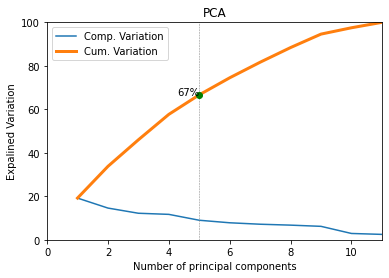

In [27]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X)) 
expLianedVariance=(pca.explained_variance_/pca.explained_variance_.sum())*100
expLianedVarianceCum=expLianedVariance.cumsum()

xlabel=range(1, expLianedVariance.size+1)
xlabel=np.reshape( np.asarray(list(xlabel)), (14,))
N_PC_sel=5
variance_N_PC= expLianedVarianceCum[N_PC_sel-1]
plt.figure( )

plt.plot(list(xlabel),expLianedVariance, label='Comp. Variation')
plt.plot(list(xlabel),expLianedVarianceCum, label = 'Cum. Variation', linewidth=3)
#Vertical line at the selected no of components
plt.axvline(x=N_PC_sel, linestyle='dashed',linewidth=.5, color='grey')
# add apoint
plt.plot(N_PC_sel,variance_N_PC, color='green', marker='o')
plt.text(N_PC_sel,variance_N_PC,"{0:.0%}".format(variance_N_PC/100.0), horizontalalignment='right')

plt.legend()
plt.title('PCA')
plt.xlabel('Number of principal components')
plt.ylabel('Expalined Variation')
plt.ylim([0,100])
plt.xlim([0,11])

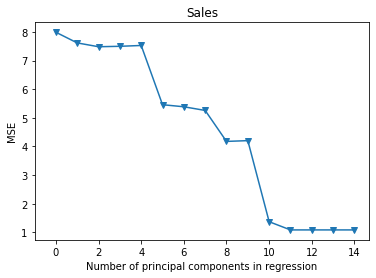

In [28]:
#Now we'll perform 10-fold cross-validation to see how it influences the MSE:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = KFold( n_splits=14, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 10 principle components, adding one component at the time.
for i in np.arange(1, 15):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Sales')
plt.xlim(xmin=-1);

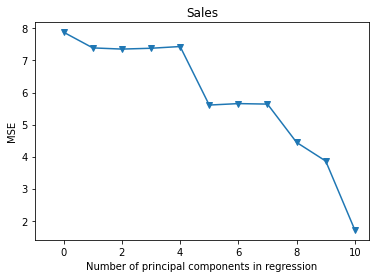

In [29]:
pca2 = PCA()


# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 11):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Sales')
plt.xlim(xmin=-1);

In [30]:
#We find that the lowest cross-validation error occurs when $M = 10$
#components are used. Now we'll see how it performs on the test data and compute the test MSE as follows:
X_reduced_test = pca2.transform(scale(X_test))[:,:14]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:14], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
print('PCR')
print("R-squared: " + str(np.sqrt(r2_score(y_test, pred))))
print("RMSE: " + str(np.sqrt(mean_squared_error(y_test, pred))))

PCR
R-squared: 0.9040139422440419
RMSE: 1.2313604992838267


PCA is performing better than all previous models with 90% accuracy.

#Partial Least Squares

(-1.0, 14.65)

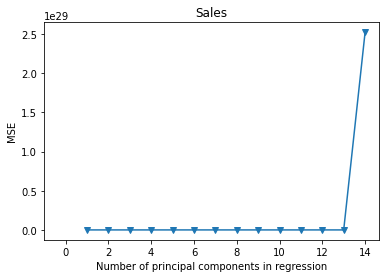

In [31]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 15):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 15), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Sales')
plt.xlim(xmin=-1)

In [32]:
#:The lowest cross-validation error occurs when only $M = 5$ partial least
#squares dimensions are used. We now evaluate the corresponding test set
#MSE:
pls = PLSRegression(n_components=5)
pls.fit(scale(X_train), y_train)

print('PLS')
print("R-squared: " + str(r2_score(y_test, pls.predict(scale(X_test)))))
print("RMSE: " + str(np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))))

PLS
R-squared: 0.8182107168336687
RMSE: 1.2280900611945285


#Conclusion

In [33]:
#Linear regression
print("Linear")
print("===============")
print("RMSE testing: " +str(np.sqrt(mean_squared_error(y_test,pred_test_lr)))) 
print("R-squared testing: " + str(r2_score(y_test, pred_test_lr)))
#Ridge
print("===============")
print("Ridge")
print("===============")
print("RMSE testing: " + str(np.sqrt(mean_squared_error(y_test,pred_test_rr)))) 
print("R-squared testing: " + str(r2_score(y_test, pred_test_rr))) 
#Ridge with paramter tuning
print("===============")
print("Ridge Paramter tuning")
print("===============")
print("RMSE testing: " + str(np.sqrt(mean_squared_error(y_test, ridge1.predict(X_test)))))
print("R-squared testing: " + str(r2_score(y_test, ridge1.predict(X_test))))
#Lasso
print("===============")
print("Lasso")
print("===============")
print("RMSE testing: " + str(np.sqrt(mean_squared_error(y_test,pred_test_lasso))))
print("R-squared testing: " + str(r2_score(y_test, pred_test_lasso)))
#Elastic Net
print("===============")
print("Elastic Net")
print("===============")
print("RMSE testing: " + str(np.sqrt(mean_squared_error(y_test,pred_test_enet))))
print("R-squared testing: " + str(r2_score(y_test, pred_test_enet)))
#PCR
print("===============")
print("PCR")
print("===============")
print("RMSE: " + str(np.sqrt(mean_squared_error(y_test, pred))))
print("R-squared: " + str(np.sqrt(r2_score(y_test, pred))))

#PLS
print("===============")
print("PLS")
print("===============")
print("RMSE: " + str(np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))))
print("R-squared: " + str(r2_score(y_test, pls.predict(scale(X_test)))))

Linear
RMSE testing: 1.1078274030007706
R-squared testing: 0.8520714327642556
Ridge
RMSE testing: 1.107336785156661
R-squared testing: 0.8522024284839407
Ridge Paramter tuning
RMSE testing: 1.1064355014405582
R-squared testing: 0.8524429214145827
Lasso
RMSE testing: 1.1793935496099688
R-squared testing: 0.8323415911718595
Elastic Net
RMSE testing: 1.2414888598947038
R-squared testing: 0.8142223360435816
PCR
RMSE: 1.2313604992838267
R-squared: 0.9040139422440419
PLS
RMSE: 1.2280900611945285
R-squared: 0.8182107168336687


In [34]:
print(models_fwd.loc[5, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              2491.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):                   4.22e-296
Time:                        07:47:09   Log-Likelihood:                         -703.38
No. Observations:                 400   AIC:                                      1417.
Df Residuals:                     395   BIC:                                      1437.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

After running all the models and comparing them choose PCR model with a 90.4% variance explanation.
However using forward or backward selection to run OLS gives us a 96.9% variance explanation using 5 variable selection. Although overfitting probably comes into play here. 